# Projeto 1 - Backtest modelo de investimento Magic Formula.


### Desafio:

* Testar se a regra de investimento da fórmula mágica, do Joel Grenblatt, funcionou no Brasil nos últimos anos.


### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Baixar os dados disponibilizados.
   
   **Passo 3** - Pegar as datas que iremos balancear a carteira. 
   
   **Passo 4** - Filtrar  a liquidez.
   
   **Passo 5** - Cria o ranking dos indicadores.
   
   **Passo 6** - Cria as carteiras. 
   
   **Passo 7** - Calcula a rentabilidade por carteira.
   
   **Passo 8** - Calcula a rentabilidade do modelo.

   **Passo 9** - Calcula a rentabilidade do ibovespa no mesmo período.

   **Passo 10** - Analisa os resultados.
   
-------------------

# Passo 1: Importando os módulos necessários

In [6]:
import pandas as pd
import quantstats as qs

# Passo 2: Baixar os dados dispobinilizados.

In [7]:
dados_empresas = pd.read_csv("dados_empresas.csv")

# Passo 3: Filtrar liquidez.

In [8]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

# Passo 4: Calcula os retornos mensais das empresas.

In [9]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1) 

# Passo 5: Cria o ranking dos indicadores.

In [10]:
dados_empresas['ranking_ev_ebit'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)

dados_empresas['ranking_final'] = dados_empresas['ranking_ev_ebit'] + dados_empresas['ranking_roic']
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

In [11]:
dados_empresas[dados_empresas['data'] == '2016-02-29'].sort_values('ranking_final').head(20)

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
10106,2016-02-29,CVCB3,12.27,7161830.0,0.19959,0.33679,0.269764,6.0,3.0,1.0
28406,2016-02-29,SEER3,6.96,2236386.0,0.22223,0.20507,0.260057,4.0,8.0,2.0
7720,2016-02-29,CMIG4,2.66,28957136.0,0.31211,0.16441,0.375940,1.0,12.0,4.0
20668,2016-02-29,MGLU3,0.08,3987001.0,0.29561,0.16916,0.375000,2.0,11.0,4.0
21300,2016-02-29,MPLU3,21.37,15877583.0,0.17595,0.99410,0.231165,12.0,1.0,4.0
31698,2016-02-29,TIET11,9.77,16338752.0,0.19507,0.24819,0.048106,8.0,6.0,6.0
4440,2016-02-29,BRKM5,17.69,104978439.0,0.19503,0.18800,-0.081967,9.0,9.0,7.0
17644,2016-02-29,ITSA4,3.24,162973314.0,0.19210,0.17827,0.197531,10.0,10.0,8.0
29229,2016-02-29,SMLE3,29.12,33052497.0,0.13734,0.47389,0.305288,20.0,2.0,9.0
13855,2016-02-29,EZTC3,7.53,16435811.0,0.22304,0.13772,0.203187,3.0,22.0,10.0


# Passo 6: Cria as carteiras. 

In [12]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]
#dados_empresas[dados_empresas['data'] == '2016-01-31']

# Passo 7: Calcula a rentabilidade por carteira.

In [13]:
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()

# Passo 8: Calcula a rentabilidade do modelo.

In [14]:
rentabilidade_por_carteiras['modelo'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)
rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()

# Passo 9: Calcula a rentabilidade do ibovespa no mesmo período.

In [15]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

# Passo 10: Analisa os resultados. 

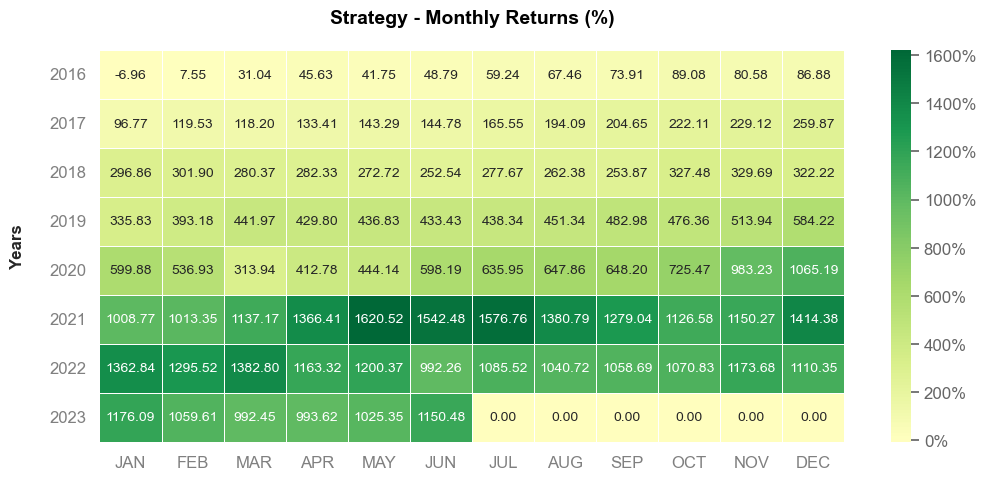

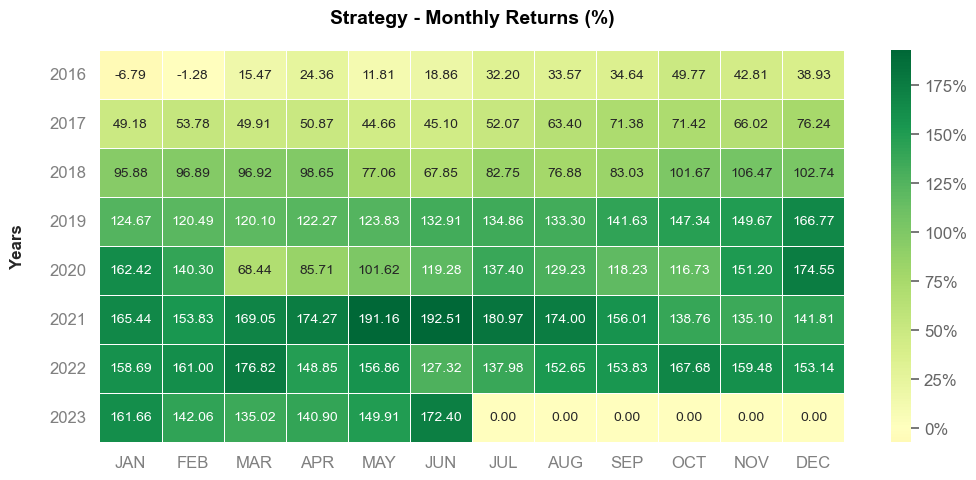

In [16]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['modelo'].plot_monthly_heatmap()
rentabilidade_por_carteiras['ibovespa'].plot_monthly_heatmap()

<AxesSubplot:xlabel='data'>

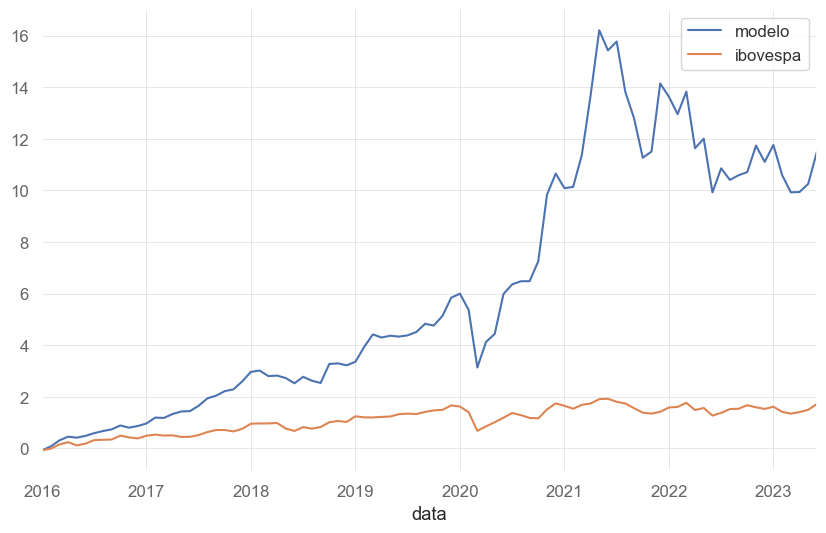

In [17]:
rentabilidade_por_carteiras.plot()

In [18]:
rentabilidade_ao_ano = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'modelo']) ** (1/7.5) - 1

rentabilidade_ao_ano

0.40047940152735406